In [1]:
 # TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow import keras
 #import keras.utils
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD

 # Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re
import pandas as pd
import cv2

 # Pillow
import PIL
from PIL import Image
print ("TenserFlow version: " +tf.__version__)

TenserFlow version: 2.0.0


In [2]:
#datasets
datasets_path = "../../Eyes/input/aptos2019-blindness-detection"
train_images_path = datasets_path + "/train_preproc/"
test_images_path = datasets_path + "/test_preproc/"

#df_train_lables = pd.read_csv(datasets_path + "/train.csv")
#df_test_lables = pd.read_csv(datasets_path + "/test.csv")

#clear df_train_lables
def clear_df(df, type_df = "train"):
    new_df = pd.DataFrame(columns=['id_code', 'diagnosis'])
    if (type_df == "train"):
        for i in range(len(df)):
            try:
                plt.imread(train_images_path + df['id_code'][i]+'.png')
                new_df.loc[len(new_df)] = [df['id_code'][i], df['diagnosis'][i]]
            except:
                a = 2+2
    if (type_df == "test"):
        for i in range(len(df)):
            try:
                plt.imread(test_images_path + df['id_code'][i]+'.png')
                new_df.loc[len(new_df)] = [df['id_code'][i], df['diagnosis'][i]]
            except:
                a = 2+2
                
    return new_df
                
#df_train_lables = clear_df(df_train_lables, type_df = "train")
#df_test_lables = clear_df(df_train_lables, type_df = "test") #train - не ошибка

#save to main_project
#df_train_lables.to_csv('train_preproc.csv', encoding='utf-8')
#df_test_lables.to_csv('test_preproc.csv', encoding='utf-8')

df_train_lables = pd.read_csv('train_preproc.csv')
df_test_lables = pd.read_csv('test_preproc.csv')
#test.csv не содержит диагноза, поэтому вызывается except и в df в итоге ничего не попадвает

df_train_lables = df_train_lables.drop(['Unnamed: 0'], axis = 1)
df_test_lables = df_test_lables.drop(['Unnamed: 0'], axis = 1)
df_train_lables

,id_code,diagnosis
0,000c1434d8d7,2
1,002c21358ce6,0
2,0083ee8054ee,4
3,0097f532ac9f,0
4,00b74780d31d,2
...,...,...
3107,ffa47f6a7bf4,2
3108,ffc04fed30e6,0
3109,ffcf7b45f213,2
3110,ffd97f8cd5aa,0


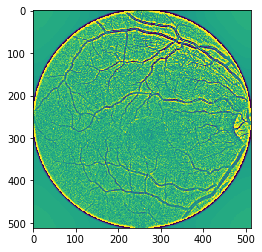

In [3]:
def get_img_by_id_code(id_code, type_img = "train"):
    if type_img == "train":
        return plt.imread(train_images_path+id_code+".png")
    if type_img == "test":
        return plt.imread(test_images_path+id_code+".png")
    
plt.imshow(get_img_by_id_code(df_train_lables['id_code'][3], type_img = "train"))

In [4]:
#create train_x array

#train_x = np.array([])
#train_x = train_x.append(train_x, new_element)
#for i in range(len(df_train_lables['id_code'])):
#    print(i)
#    train_x = np.append(train_x, get_img_by_id_code(df_train_lables['id_code'][i], type_img = "train"))

In [5]:
#сохранение массива train_x
#np.save('train_x', train_x)
#np.load('train_x.npy')

In [11]:
train_x = np.load('train_x.npy')
train_x = np.reshape(train_x, (1,3112, 512, 512))

In [7]:
train_y = np.array([])
for i in range(len(df_train_lables['diagnosis'])):
    train_y = np.append(train_y, df_train_lables['diagnosis'][i])

In [8]:
model = Sequential([
    Conv2D(64, kernel_size=3, activation='relu', input_shape=(512,512,1)),
    MaxPool2D(),
    #Conv2D(128, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(5, activation = 'softmax')
])

In [9]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs = 3)